# DSCI 100 Final Project Proposal: Wine Quality Prediction
- Group 100: Heidi, Tasneem, Gina, and Emily
- Dataset: Wine Quality Dataset found on UCI


## Introduction

For thousands of years, high quality wine-making was an art that demanded recipes and techniques passed down from generations to generation through trial and error. In the past century, rapid scientific advancement has changed the wine-making process through its discovery on how certain ingredients contribute to important chemical reactions in steps like fermentation.

The dataset used will come from the Wine Quality Dataset found on the UCI Machine Learning Repository, containing the quality and chemical quantities of 1599 wine samples from the north of Portugal, named "Vinho Verde" wine.

In this project, we are aiming to create a classification model that predicts the quality of wine from a scale of 1-8 using volatile acidity (level of wine's gaseous acid), density (mass per unit volume of wine), and chloride amount.DSCI 100 Final Project Proposal
- Dataset: Wine Quality Dataset found on UCI

## Dataset
Wine Quality Dataset
- Source: https://archive.ics.uci.edu/ml/datasets/wine+quality
- 12 variables in total
- Length: 4898
- 2 sub datasets, one for red wine and one for white

12 numerical variables
1. Fixed Acidity
2. Volatile Acidity
3. Citric acid
4. Residual sugar
5. Chlorides
6. Free sulfur dioxide
7. Total sulfur dioxide
8. Density
9. pH
10. Sulphates
11. Alcohol
12. Quality (score between 0 and 10)

## Research Question
- Will we be able to catagorize a wine's quality using the classification model we built?

### Tidy Data

In [1]:
###
### Run this cell before continuing.
###

library(repr)
library(tidyverse)
library(tidymodels)
library(RColorBrewer)
require(gridExtra)
options(repr.matrix.max.rows = 7)
install.packages("GGally")
library(GGally)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
winequalityRed <- read_csv2("data/winequality-red.csv")
winequalityRed
winequalityWhite <- read_csv2("data/winequality-white.csv")
winequalityWhite

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Warning message:
“One or more parsing issues, see `problems()` for details”
Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (5): volatile acidity, citric acid, chlorides, density, sulphates
dbl (2): total sulfur dioxide, quality

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
74,0.7,0,19,0.076,11,34,0.9978,351,0.56,94,5
78,0.88,0,26,0.098,25,67,0.9968,32,0.68,98,5
78,0.76,0.04,23,0.092,15,54,0.997,326,0.65,98,5
112,0.28,0.56,19,0.075,17,60,0.998,316,0.58,98,6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
63,0.51,0.13,23,0.076,29,40,0.99574,342,0.75,11,6
59,0.645,0.12,2,0.075,32,44,0.99547,357,0.71,102,5
6,0.31,0.47,36,0.067,18,42,0.99549,339,0.66,11,6


ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 4898 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (6): volatile acidity, citric acid, residual sugar, chlorides, density, ...
dbl (1): quality

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,88,6
63,0.3,0.34,1.6,0.049,14,132,0.994,33,0.49,95,6
81,0.28,0.4,6.9,0.05,30,97,0.9951,326,0.44,101,6
72,0.23,0.32,8.5,0.058,47,186,0.9956,319,0.4,99,6
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
65,0.24,0.19,1.2,0.041,30,111,0.99254,299,0.46,94,6
55,0.29,0.3,1.1,0.022,20,110,0.98869,334,0.38,128,7
6,0.21,0.38,0.8,0.02,22,98,0.98941,326,0.32,118,6


In [3]:
winequalityWhite <- mutate(winequalityWhite, type = "white")
# winequalityWhite

In [4]:
winequalityRed <- mutate(winequalityRed, type = "red")
# winequalityRed

In [5]:
winequalityWhite <- mutate(winequalityWhite, quality = as.factor(quality))
winequalityWhite

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<fct>,<chr>
7,0.27,0.36,20.7,0.045,45,170,1.001,3,0.45,88,6,white
63,0.3,0.34,1.6,0.049,14,132,0.994,33,0.49,95,6,white
81,0.28,0.4,6.9,0.05,30,97,0.9951,326,0.44,101,6,white
72,0.23,0.32,8.5,0.058,47,186,0.9956,319,0.4,99,6,white
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
65,0.24,0.19,1.2,0.041,30,111,0.99254,299,0.46,94,6,white
55,0.29,0.3,1.1,0.022,20,110,0.98869,334,0.38,128,7,white
6,0.21,0.38,0.8,0.02,22,98,0.98941,326,0.32,118,6,white


In [6]:
winequalityRed <- mutate(winequalityRed, quality = as.factor(quality))
winequalityRed

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<fct>,<chr>
74,0.7,0,19,0.076,11,34,0.9978,351,0.56,94,5,red
78,0.88,0,26,0.098,25,67,0.9968,32,0.68,98,5,red
78,0.76,0.04,23,0.092,15,54,0.997,326,0.65,98,5,red
112,0.28,0.56,19,0.075,17,60,0.998,316,0.58,98,6,red
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
63,0.51,0.13,23,0.076,29,40,0.99574,342,0.75,11,6,red
59,0.645,0.12,2,0.075,32,44,0.99547,357,0.71,102,5,red
6,0.31,0.47,36,0.067,18,42,0.99549,339,0.66,11,6,red


In [7]:
completedt <- rbind(winequalityRed, winequalityWhite) |>
              setNames(c("fixed_acidity",
                         "volatile_acidity",
                         "citric_acid",
                         "residual_sugar",
                         "chlorides",
                         "free_SO2",
                         "total_SO2",
                         "density",
                         "pH",
                         "sulphates",
                         "alcohol",
                         "quality",
                         "type"))
completedt$volatile_acidity <- as.numeric(completedt$volatile_acidity)
completedt$citric_acid <- as.numeric(completedt$citric_acid)
completedt$residual_sugar <- as.numeric(completedt$residual_sugar)
completedt$chlorides <- as.numeric(completedt$chlorides)
completedt$density <- as.numeric(completedt$density)
completedt$sulphates <- as.numeric(completedt$sulphates)
completedt

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_SO2,total_SO2,density,pH,sulphates,alcohol,quality,type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
74,0.70,0.00,19,0.076,11,34,0.9978,351,0.56,94,5,red
78,0.88,0.00,26,0.098,25,67,0.9968,32,0.68,98,5,red
78,0.76,0.04,23,0.092,15,54,0.9970,326,0.65,98,5,red
112,0.28,0.56,19,0.075,17,60,0.9980,316,0.58,98,6,red
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
65,0.24,0.19,1.2,0.041,30,111,0.99254,299,0.46,94,6,white
55,0.29,0.30,1.1,0.022,20,110,0.98869,334,0.38,128,7,white
6,0.21,0.38,0.8,0.020,22,98,0.98941,326,0.32,118,6,white


## Exploratory Data Analysis

### Training Data
The following information includes
- Training Set
- Total Number of Rows
- Number of Missing Data
- Counts for Each Wine Quality type
- Mean values for each factors for each quality level of the 2 types of wine

In [8]:
wine_split <- initial_split(completedt, prop = 0.75, strata = quality)
wine_training <- training(wine_split)
wine_testing <- testing(wine_split)
wine_training

fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_SO2,total_SO2,density,pH,sulphates,alcohol,quality,type
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
74,0.70,0.00,19,0.076,11,34,0.9978,351,0.56,94,5,red
78,0.88,0.00,26,0.098,25,67,0.9968,32,0.68,98,5,red
78,0.76,0.04,23,0.092,15,54,0.9970,326,0.65,98,5,red
74,0.70,0.00,19,0.076,11,34,0.9978,351,0.56,94,5,red
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
62,0.21,0.28,5.7,0.028,45,121,0.99168,321,1.08,1215,7,white
62,0.41,0.22,1.9,0.023,5,56,0.98928,304,0.79,13,7,white
55,0.29,0.30,1.1,0.022,20,110,0.98869,334,0.38,128,7,white


### Total Number of Rows & Missing Data

In [9]:
number_of_rows <- nrow(wine_training)
row_result <- "Total Number of Rows: "
miss_data_result <- "Number of missing data: "
row_result
number_of_rows
miss_data_result
sum(is.na(wine_training))

[1] "Total Number of Rows: "

[1] 4872

[1] "Number of missing data: "

[1] 0

### Counts for Each Wine Quality

In [10]:
counts_quality <- wine_training |>
                  group_by(quality) |>
                  summarize(n = n())
print(as_tibble(counts_quality),n=nrow(counts_quality))

# A tibble: 7 × 2
  quality     n
  <fct>   <int>
1 3          21
2 4         145
3 5        1610
4 6        2137
5 7         811
6 8         144
7 9           4


### Mean Variable values for each Quality level of Wine

In [11]:
# separate the training data into red and white
red_wine_train <- wine_training |>
                  filter(type == "red")

white_wine_train <- wine_training |>
                    filter(type == "white")
                  

red_wine_means <- red_wine_train |>
                  group_by(quality) |>
                  summarize(mean_fix_acidity = mean(fixed_acidity, na.rm = TRUE),
                  mean_v_acidity = mean(volatile_acidity, na.rm = TRUE),
                  mean_citric_acid = mean(fixed_acidity, na.rm = TRUE),
                  mean_res_sugar = mean(fixed_acidity, na.rm = TRUE),
                  mean_chlorides = mean(fixed_acidity, na.rm = TRUE),
                  mean_free_SO2 = mean(fixed_acidity, na.rm = TRUE),
                  mean_total_SO2 = mean(fixed_acidity, na.rm = TRUE),
                  mean_density = mean(fixed_acidity, na.rm = TRUE),
                  mean_pH = mean(fixed_acidity, na.rm = TRUE),
                  mean_sulphates = mean(fixed_acidity, na.rm = TRUE),
                  mean_alcohol = mean(alcohol, na.rm = TRUE))

white_wine_means <- white_wine_train |>
                    group_by(quality) |>
                    summarize(mean_fix_acidity = mean(fixed_acidity, na.rm = TRUE),
                    mean_v_acidity = mean(volatile_acidity, na.rm = TRUE),
                    mean_citric_acid = mean(fixed_acidity, na.rm = TRUE),
                    mean_res_sugar = mean(fixed_acidity, na.rm = TRUE),
                    mean_chlorides = mean(fixed_acidity, na.rm = TRUE),
                    mean_free_SO2 = mean(fixed_acidity, na.rm = TRUE),
                    mean_total_SO2 = mean(fixed_acidity, na.rm = TRUE),
                    mean_density = mean(fixed_acidity, na.rm = TRUE),
                    mean_pH = mean(fixed_acidity, na.rm = TRUE),
                    mean_sulphates = mean(fixed_acidity, na.rm = TRUE),
                    mean_alcohol = mean(alcohol, na.rm = TRUE))

red_wine_means
white_wine_means

quality,mean_fix_acidity,mean_v_acidity,mean_citric_acid,mean_res_sugar,mean_chlorides,mean_free_SO2,mean_total_SO2,mean_density,mean_pH,mean_sulphates,mean_alcohol
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,89.00000,0.8528571,89.00000,89.00000,89.00000,89.00000,89.00000,89.00000,89.00000,89.00000,2.005714e+02
4,68.21875,0.6918750,68.21875,68.21875,68.21875,68.21875,68.21875,68.21875,68.21875,68.21875,1.022812e+02
5,73.95000,0.5745096,73.95000,73.95000,73.95000,73.95000,73.95000,73.95000,73.95000,73.95000,9.329423e+01
6,74.90618,0.4967164,74.90618,74.90618,74.90618,74.90618,74.90618,74.90618,74.90618,74.90618,4.672353e+12
7,83.36242,0.4158054,83.36242,83.36242,83.36242,83.36242,83.36242,83.36242,83.36242,83.36242,9.105145e+11
8,74.60000,0.4253333,74.60000,74.60000,74.60000,74.60000,74.60000,74.60000,74.60000,74.60000,9.153333e+01


quality,mean_fix_acidity,mean_v_acidity,mean_citric_acid,mean_res_sugar,mean_chlorides,mean_free_SO2,mean_total_SO2,mean_density,mean_pH,mean_sulphates,mean_alcohol
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,71.57143,0.3146429,71.57143,71.57143,71.57143,71.57143,71.57143,71.57143,71.57143,71.57143,8.942857e+01
4,63.23894,0.3819912,63.23894,63.23894,63.23894,63.23894,63.23894,63.23894,63.23894,63.23894,9.533628e+01
5,64.66881,0.3023991,64.66881,64.66881,64.66881,64.66881,64.66881,64.66881,64.66881,64.66881,4.043119e+12
6,61.94065,0.2613669,61.94065,61.94065,61.94065,61.94065,61.94065,61.94065,61.94065,61.94065,1.252398e+12
7,61.05740,0.2625529,61.05740,61.05740,61.05740,61.05740,61.05740,61.05740,61.05740,61.05740,1.197180e+12
8,57.58140,0.2709302,57.58140,57.58140,57.58140,57.58140,57.58140,57.58140,57.58140,57.58140,1.045504e+02
9,75.00000,0.3075000,75.00000,75.00000,75.00000,75.00000,75.00000,75.00000,75.00000,75.00000,1.200000e+02


#### Red Wine Means

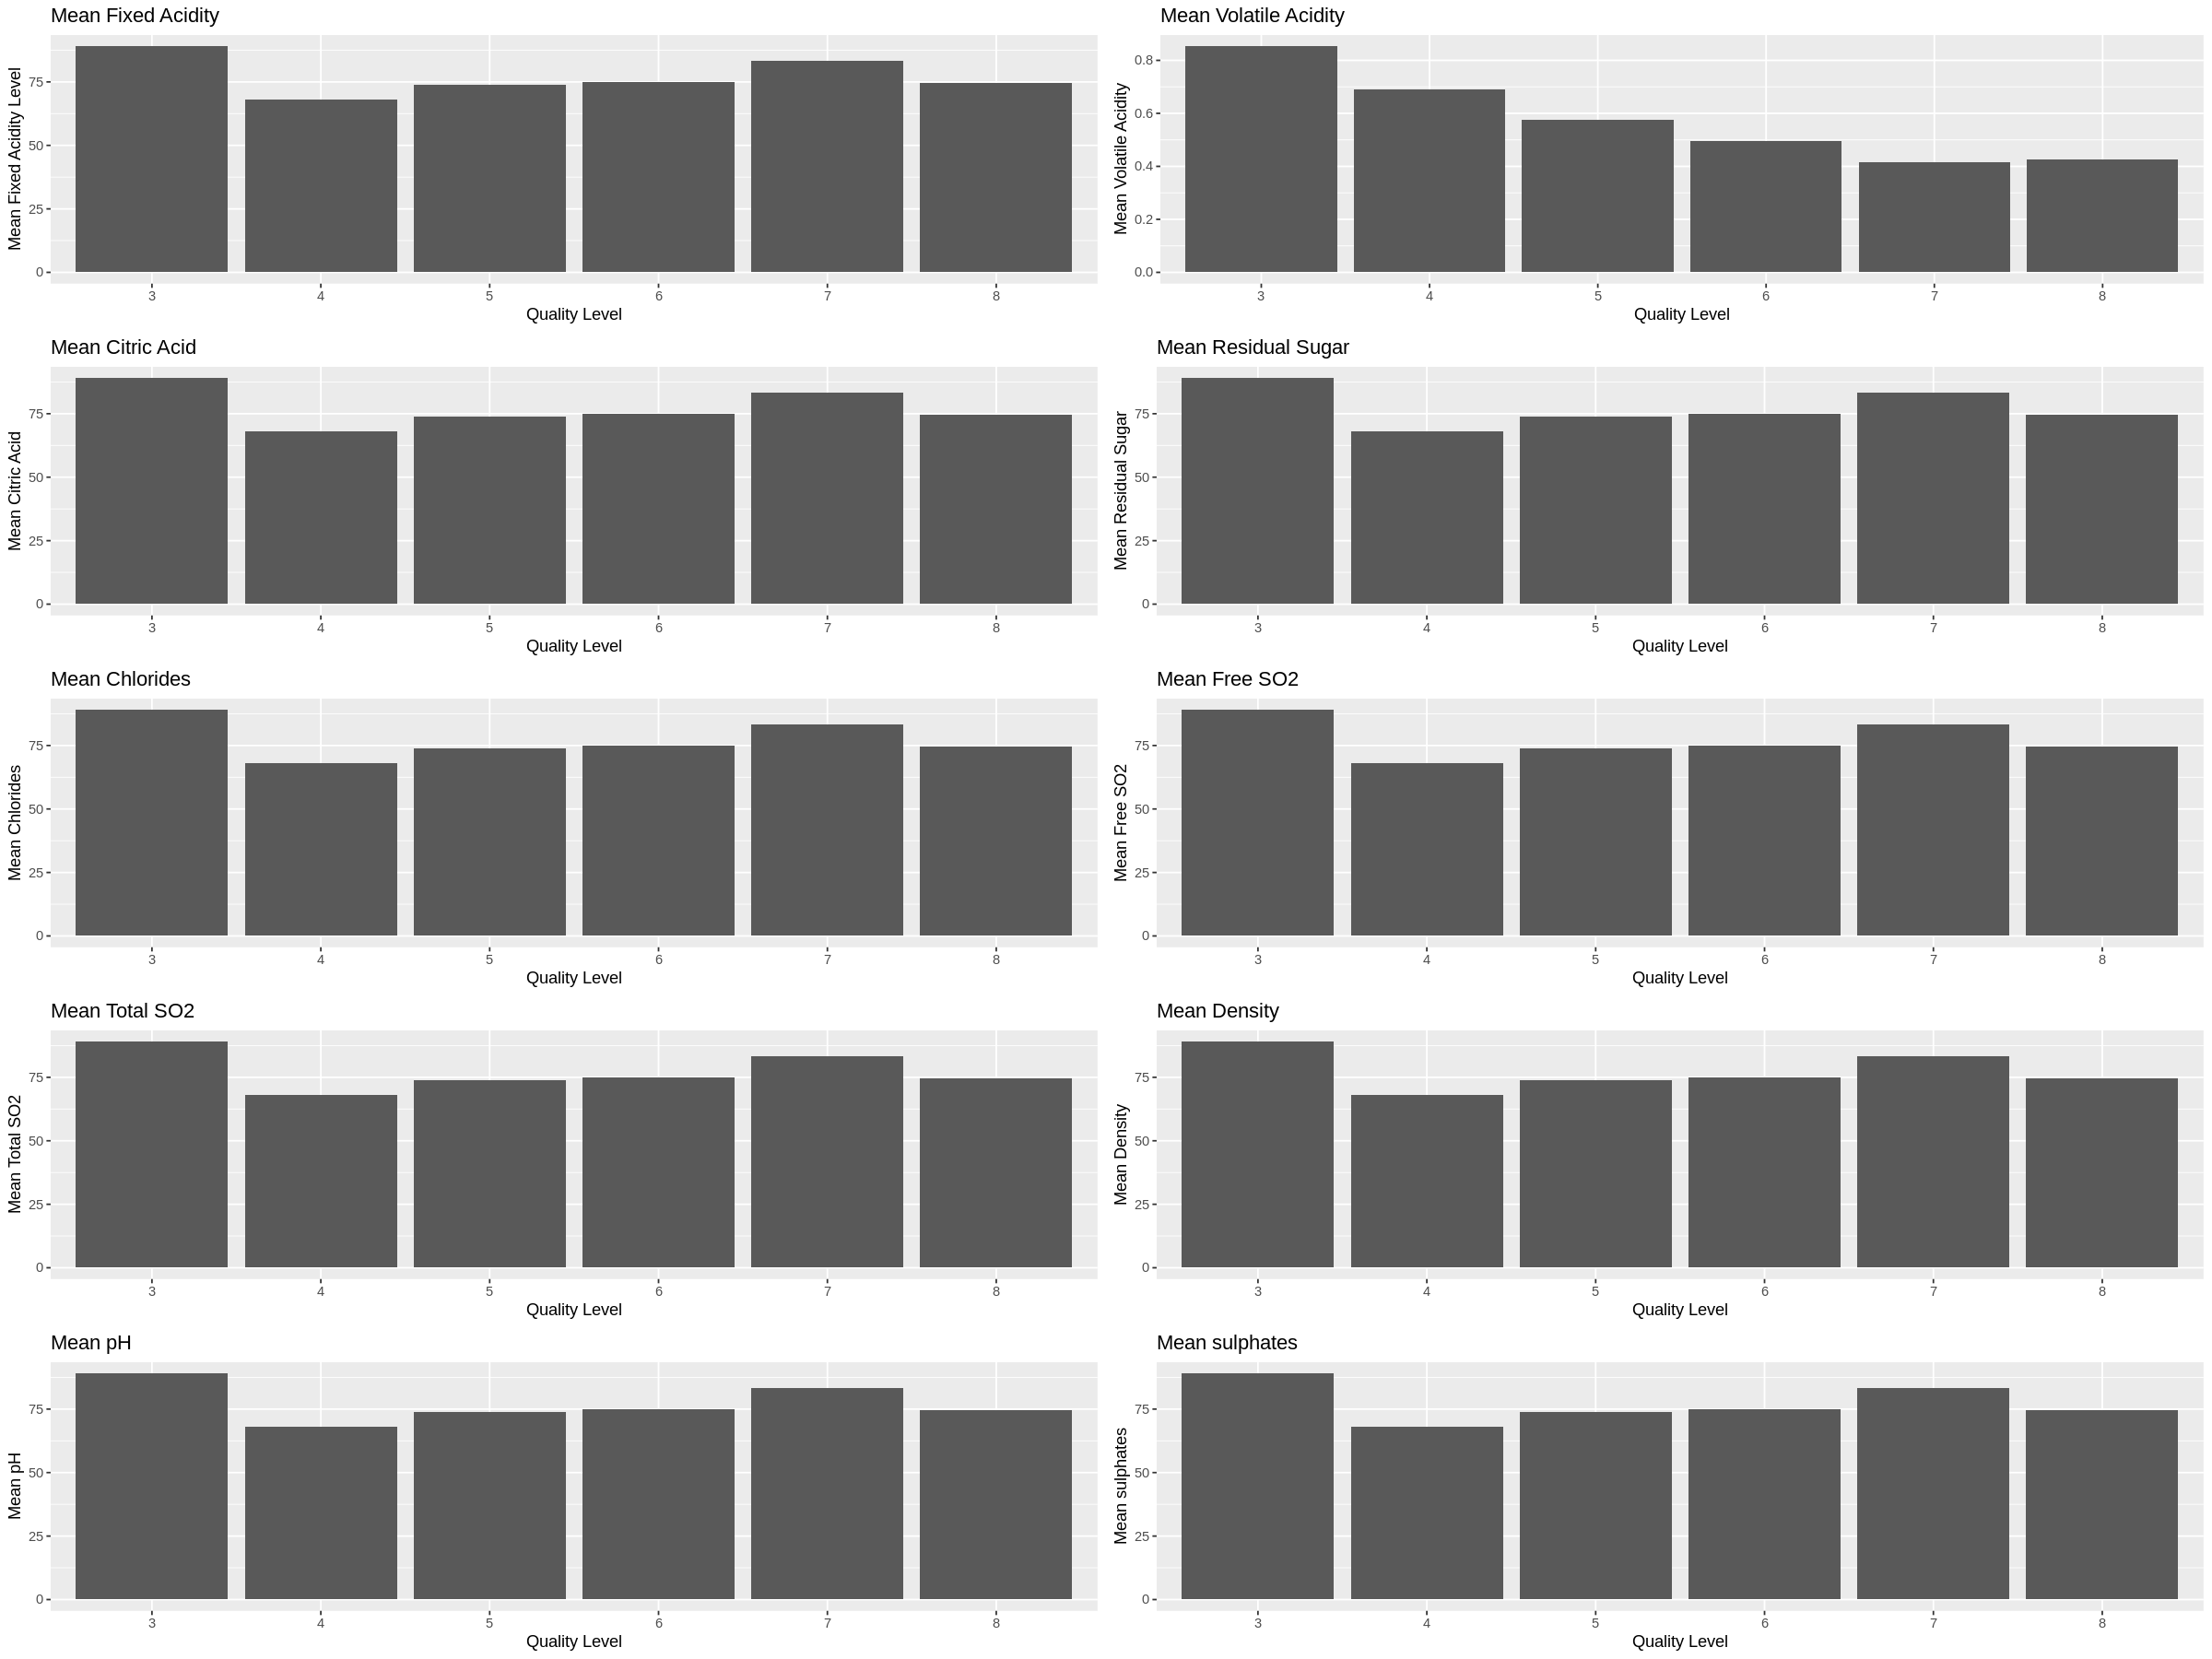

In [12]:
red_wine_fix_acidity_plot <- red_wine_means |>
                             ggplot(aes(x = quality, y = mean_fix_acidity)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Fixed Acidity")) +
                             labs(x = "Quality Level", y = "Mean Fixed Acidity Level")

red_wine_volatile_acidity_plot <- red_wine_means |>
                             ggplot(aes(x = quality, y = mean_v_acidity)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Volatile Acidity")) +
                             labs(x = "Quality Level", y = "Mean Volatile Acidity")

red_wine_citric_acid_plot <- red_wine_means |>
                             ggplot(aes(x = quality, y = mean_citric_acid)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Citric Acid")) +
                             labs(x = "Quality Level", y = "Mean Citric Acid")

red_wine_residual_sugar_plot <- red_wine_means |>
                             ggplot(aes(x = quality, y = mean_res_sugar)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Residual Sugar")) +
                             labs(x = "Quality Level", y = "Mean Residual Sugar")

red_wine_chlorides_plot <- red_wine_means |>
                             ggplot(aes(x = quality, y = mean_chlorides)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Chlorides")) +
                             labs(x = "Quality Level", y = "Mean Chlorides")

red_wine_free_SO2_plot <- red_wine_means |>
                             ggplot(aes(x = quality, y = mean_free_SO2)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Free SO2")) +
                             labs(x = "Quality Level", y = "Mean Free SO2")

red_wine_total_SO2_plot <- red_wine_means |>
                             ggplot(aes(x = quality, y = mean_total_SO2)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Total SO2")) +
                             labs(x = "Quality Level", y = "Mean Total SO2")

red_wine_density_plot <- red_wine_means |>
                             ggplot(aes(x = quality, y = mean_density)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Density")) +
                             labs(x = "Quality Level", y = "Mean Density")

red_wine_pH_plot <- red_wine_means |>
                             ggplot(aes(x = quality, y = mean_pH)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean pH")) +
                             labs(x = "Quality Level", y = "Mean pH")

red_wine_sulphates_plot <- red_wine_means |>
                             ggplot(aes(x = quality, y = mean_sulphates)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean sulphates")) +
                             labs(x = "Quality Level", y = "Mean sulphates")

options(repr.plot.width = 20, repr.plot.height = 15) 
library(cowplot)
plot_grid(red_wine_fix_acidity_plot, 
          red_wine_volatile_acidity_plot, 
          red_wine_citric_acid_plot, 
          red_wine_residual_sugar_plot,
          red_wine_chlorides_plot, 
          red_wine_free_SO2_plot, 
          red_wine_total_SO2_plot, 
          red_wine_density_plot,
          red_wine_pH_plot, 
          red_wine_sulphates_plot, 
          nrow = 5)

#### White Wine Means

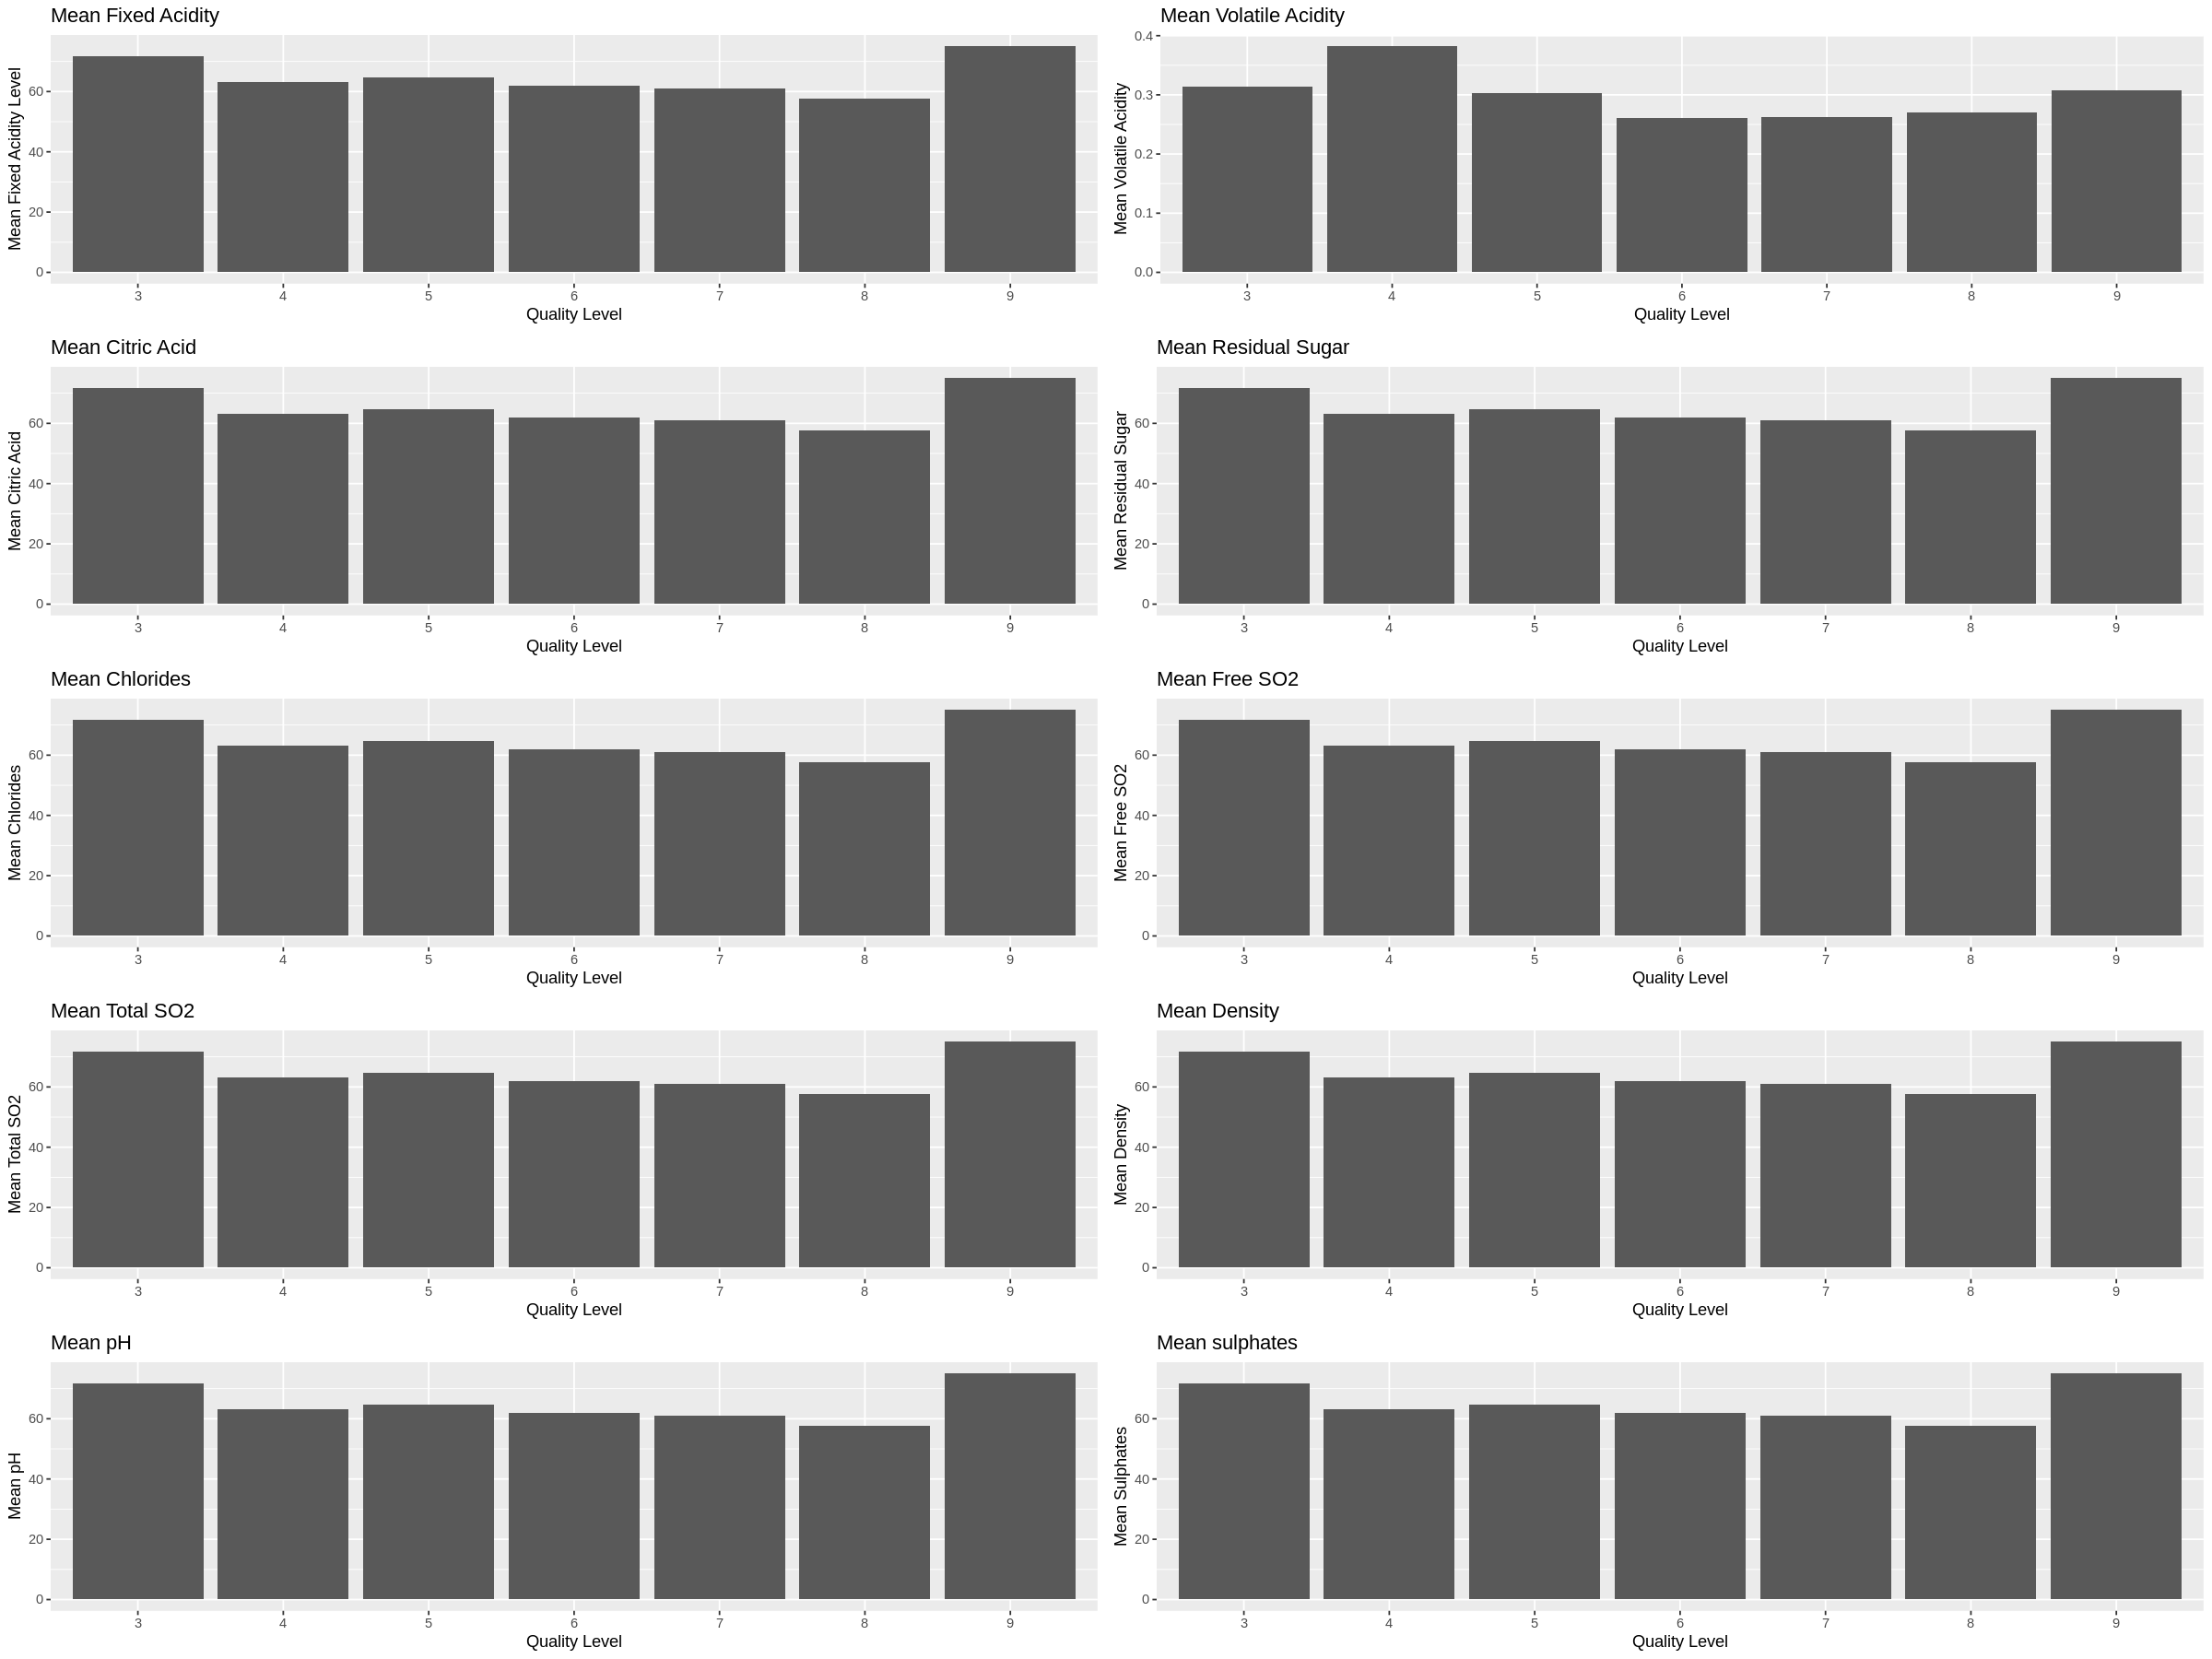

In [13]:
white_wine_fix_acidity_plot <- white_wine_means |>
                             ggplot(aes(x = quality, y = mean_fix_acidity)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Fixed Acidity")) +
                             labs(x = "Quality Level", y = "Mean Fixed Acidity Level")

white_wine_volatile_acidity_plot <- white_wine_means |>
                             ggplot(aes(x = quality, y = mean_v_acidity)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Volatile Acidity")) +
                             labs(x = "Quality Level", y = "Mean Volatile Acidity")

white_wine_citric_acid_plot <- white_wine_means |>
                             ggplot(aes(x = quality, y = mean_citric_acid)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Citric Acid")) +
                             labs(x = "Quality Level", y = "Mean Citric Acid")

white_wine_residual_sugar_plot <- white_wine_means |>
                             ggplot(aes(x = quality, y = mean_res_sugar)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Residual Sugar")) +
                             labs(x = "Quality Level", y = "Mean Residual Sugar")

white_wine_chlorides_plot <- white_wine_means |>
                             ggplot(aes(x = quality, y = mean_chlorides)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Chlorides")) +
                             labs(x = "Quality Level", y = "Mean Chlorides")

white_wine_free_SO2_plot <- white_wine_means |>
                             ggplot(aes(x = quality, y = mean_free_SO2)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Free SO2")) +
                             labs(x = "Quality Level", y = "Mean Free SO2")

white_wine_total_SO2_plot <- white_wine_means |>
                             ggplot(aes(x = quality, y = mean_total_SO2)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Total SO2")) +
                             labs(x = "Quality Level", y = "Mean Total SO2")

white_wine_density_plot <- white_wine_means |>
                             ggplot(aes(x = quality, y = mean_density)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean Density")) +
                             labs(x = "Quality Level", y = "Mean Density")

white_wine_pH_plot <- white_wine_means |>
                             ggplot(aes(x = quality, y = mean_pH)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean pH")) +
                             labs(x = "Quality Level", y = "Mean pH")

white_wine_sulphates_plot <- white_wine_means |>
                             ggplot(aes(x = quality, y = mean_sulphates)) +
                             geom_bar(stat = "identity") +
                             ggtitle(paste0("Mean sulphates")) +
                             labs(x = "Quality Level", y = "Mean Sulphates")

options(repr.plot.width = 20, repr.plot.height = 15) 
library(cowplot)
plot_grid(white_wine_fix_acidity_plot, 
          white_wine_volatile_acidity_plot, 
          white_wine_citric_acid_plot, 
          white_wine_residual_sugar_plot,
          white_wine_chlorides_plot, 
          white_wine_free_SO2_plot, 
          white_wine_total_SO2_plot, 
          white_wine_density_plot,
          white_wine_pH_plot, 
          white_wine_sulphates_plot, 
          nrow = 5)

### Distribution of Variables: Visualization

Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”
Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


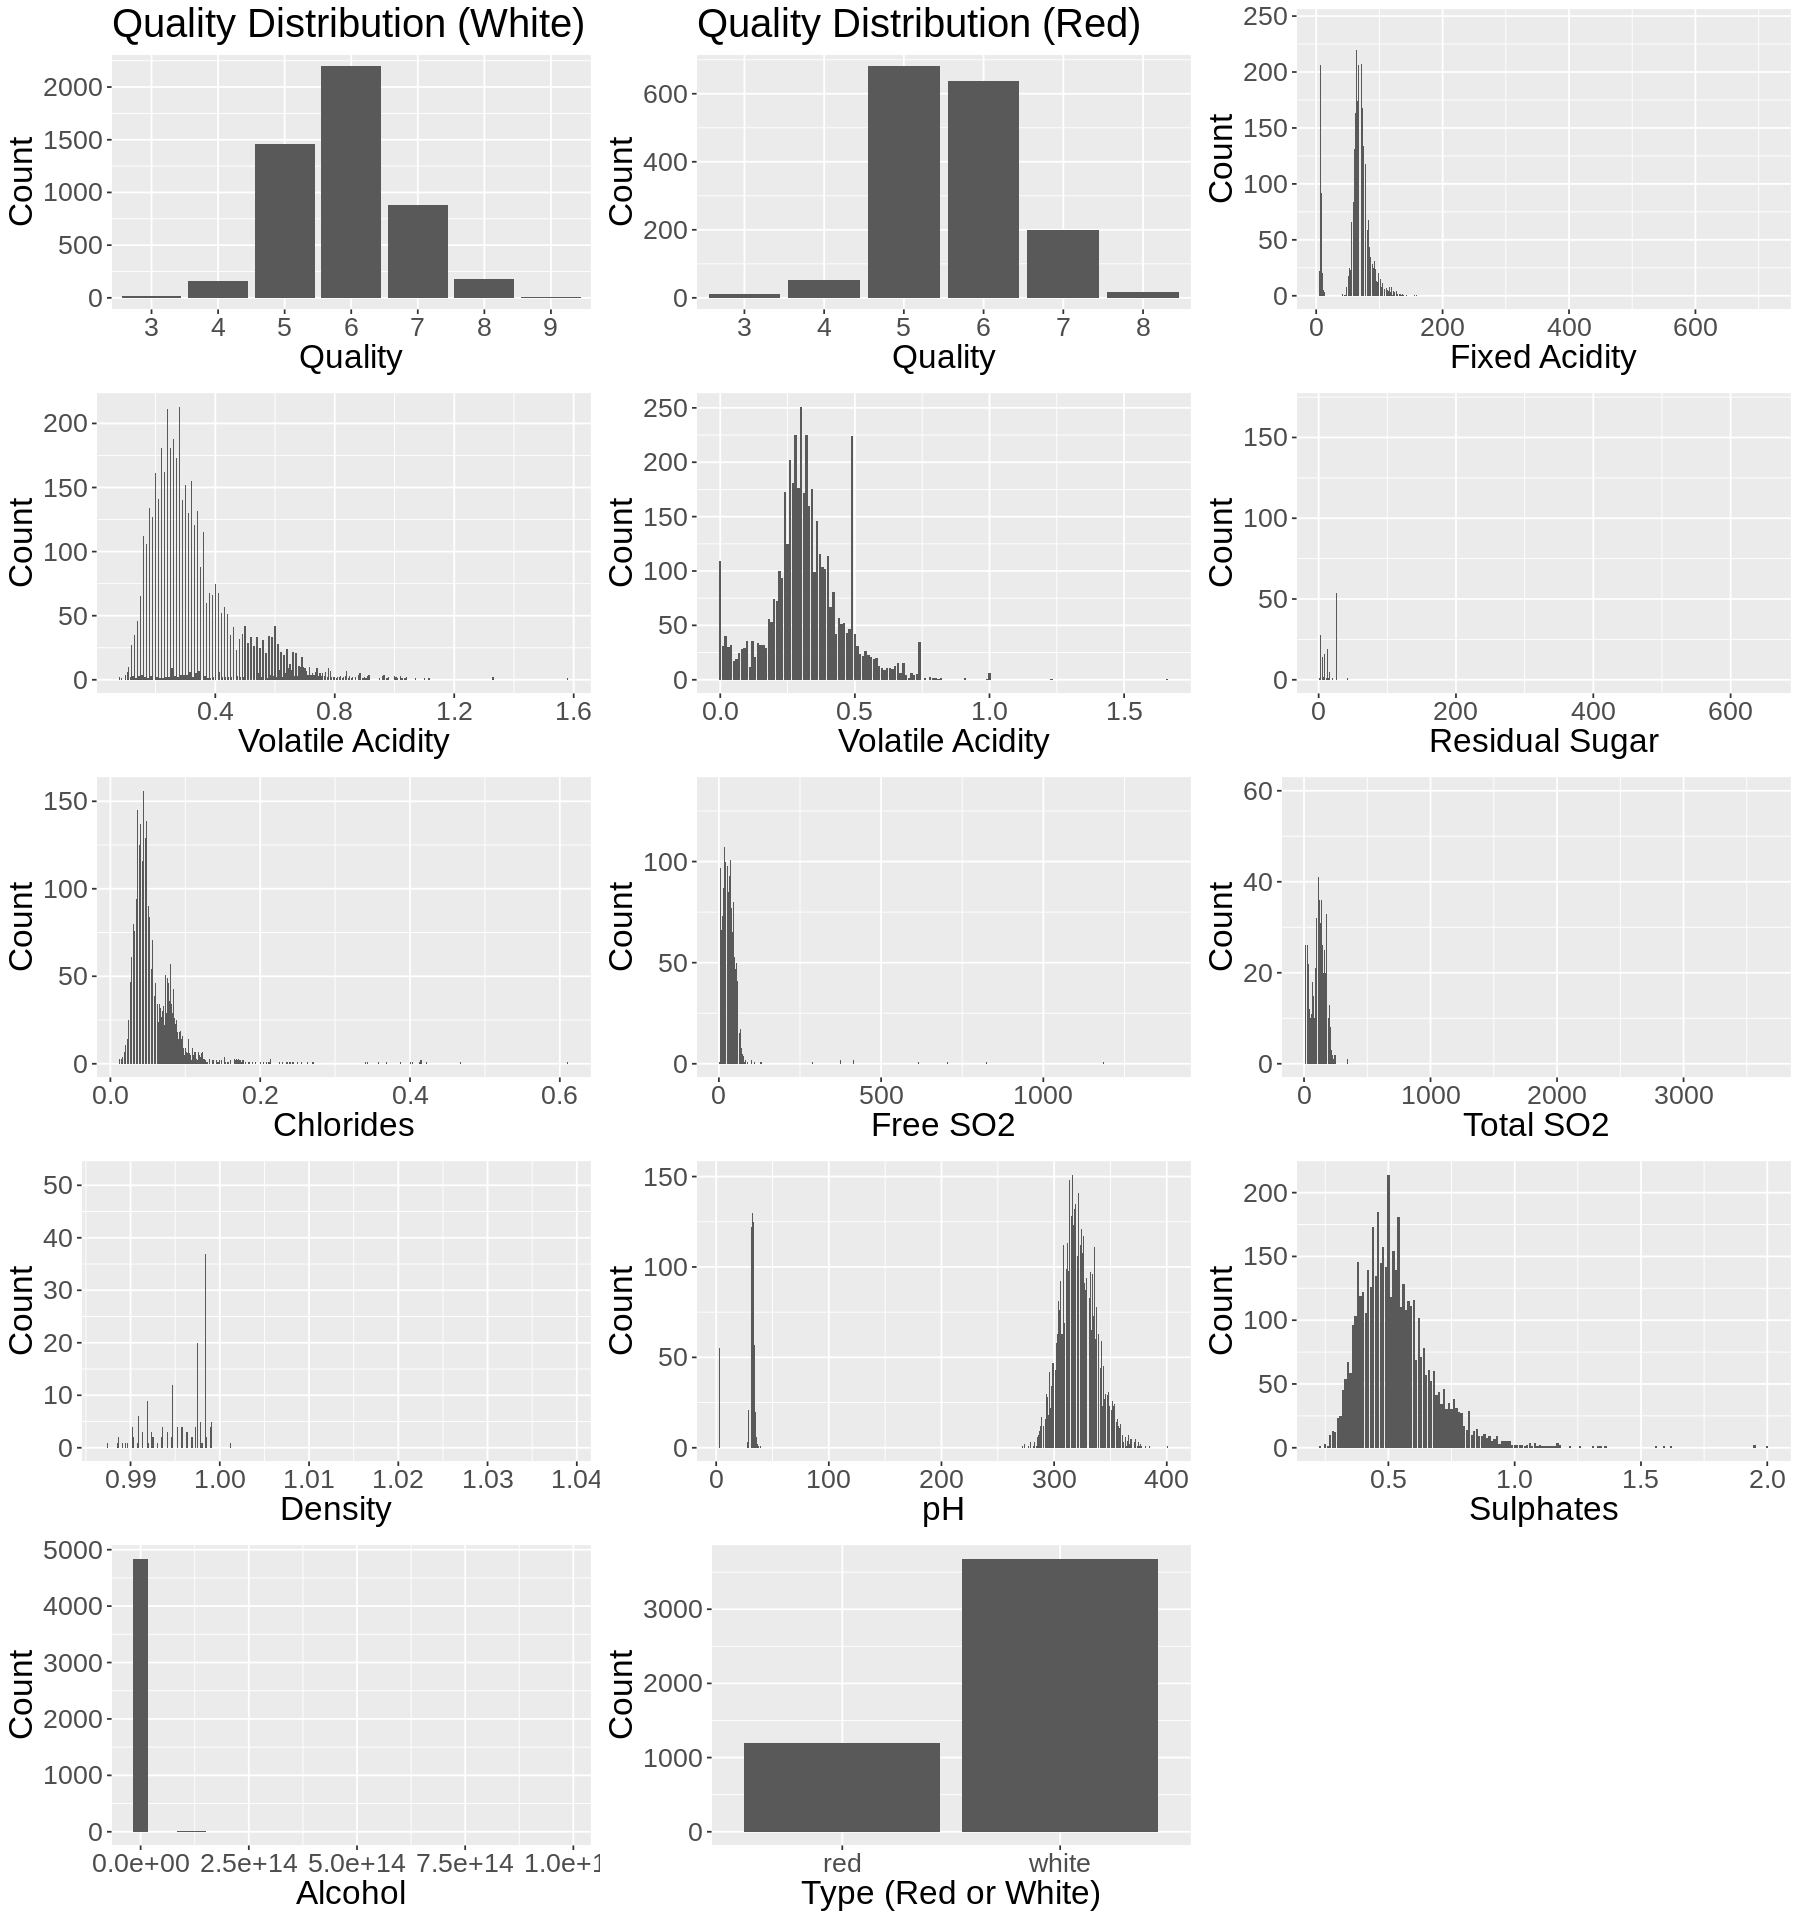

In [16]:
white_quality_dis <- ggplot(winequalityWhite, aes(x = quality)) +
    geom_histogram(stat="count") +
    ggtitle("Quality Distribution (White)") +
    labs(x = "Quality", y = "Count") +
    theme(text=element_text(size=20))

red_quality_dis <- ggplot(winequalityRed, aes(x = quality)) +
    geom_histogram(stat="count") +
    ggtitle("Quality Distribution (Red)") +
    labs(x = "Quality", y = "Count") +
    theme(text=element_text(size=20))

fixed_acidity_dis <- ggplot(wine_training, aes(x = fixed_acidity)) +
    geom_histogram(stat="count") +
    labs(x = "Fixed Acidity", y = "Count") +
    theme(text=element_text(size=20))

volatile_acidity_dis <- ggplot(wine_training, aes(x = volatile_acidity)) +
    geom_histogram(stat="count") +
    labs(x = "Volatile Acidity", y = "Count") +
    theme(text=element_text(size=20))

citric_acid_dis <- ggplot(wine_training, aes(x = citric_acid)) +
    geom_histogram(bins=30, stat="count") +
    labs(x = "Volatile Acidity", y = "Count") +
    theme(text=element_text(size=20))

residual_sugar_dis <- ggplot(wine_training, aes(x = residual_sugar)) +
    geom_histogram(bins=30, stat="count") +
    labs(x = "Residual Sugar", y = "Count") +
    theme(text=element_text(size=20))

chlorides_dis <- ggplot(wine_training, aes(x = chlorides)) +
    geom_histogram(bins=30, stat="count") +
    labs(x = "Chlorides", y = "Count") +
    theme(text=element_text(size=20))

free_SO2_dis <- ggplot(wine_training, aes(x = free_SO2)) +
    geom_histogram(bins=30, stat="count") +
    labs(x = "Free SO2", y = "Count") +
    theme(text=element_text(size=20))

total_SO2_dis <- ggplot(wine_training, aes(x = total_SO2)) +
    geom_histogram(bins=30, stat="count") +
    labs(x = "Total SO2", y = "Count") +
    theme(text=element_text(size=20))

density_dis <- ggplot(wine_training, aes(x = density)) +
    geom_histogram(bins=30, stat="count") +
    labs(x = "Density", y = "Count") +
    theme(text=element_text(size=20)) 

pH_dis <- ggplot(wine_training, aes(x = pH)) +
    geom_histogram(bins=30, stat="count") +
    labs(x = "pH", y = "Count") +
    theme(text=element_text(size=20)) 

sulphates_dis <- ggplot(wine_training, aes(x = sulphates)) +
    geom_histogram(bins=30, stat="count") +
    labs(x = "Sulphates", y = "Count") +
    theme(text=element_text(size=20)) 

alcohol_dis <- ggplot(wine_training, aes(x = alcohol)) +
    geom_histogram(bins=30) +
    labs(x = "Alcohol", y = "Count") +
    theme(text=element_text(size=20)) 

type_dis <- ggplot(wine_training, aes(x = type)) +
    geom_histogram(bins=30,stat="count") +
    labs(x = "Type (Red or White)", y = "Count") +
    theme(text=element_text(size=20))

options(repr.plot.width = 15, repr.plot.height = 16)
grid.arrange(white_quality_dis, red_quality_dis, 
             fixed_acidity_dis, volatile_acidity_dis, citric_acid_dis, residual_sugar_dis, 
             chlorides_dis, free_SO2_dis, total_SO2_dis, density_dis, pH_dis, sulphates_dis,
             alcohol_dis, type_dis, ncol=3)

#### pH vs Quality of red wine samples and white wine samples.

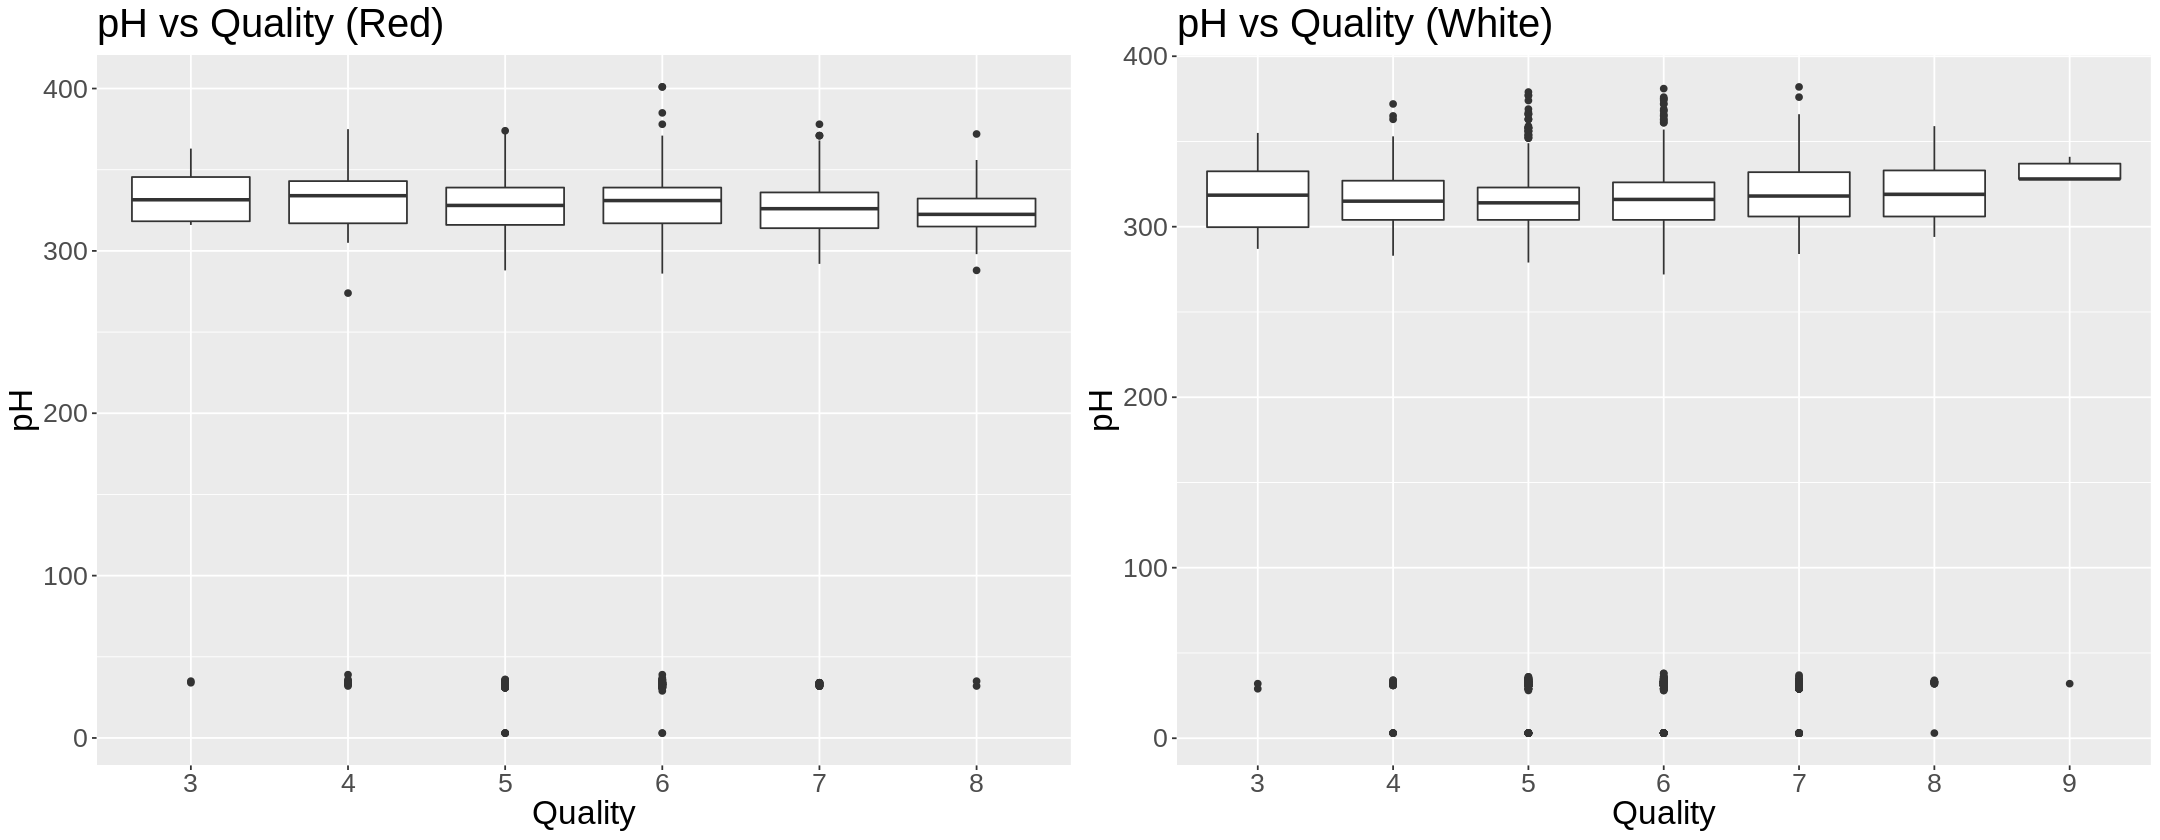

In [15]:
red_pH_vs_quality <- ggplot(winequalityRed, aes(x = quality, y = pH)) +
    geom_boxplot() +
    ggtitle("pH vs Quality (Red)") +
    labs(x = "Quality", y = "pH") +
    theme(text=element_text(size=20))

white_pH_vs_quality <- ggplot(winequalityWhite, aes(x = quality, y = pH)) +
    geom_boxplot() +
    ggtitle("pH vs Quality (White)") +
    labs(x = "Quality", y = "pH") +
    theme(text=element_text(size=20))

options(repr.plot.width = 18, repr.plot.height = 7)
grid.arrange(red_pH_vs_quality, white_pH_vs_quality, ncol=2)

## Methods

ERROR: Error in cor(wine_training): 'x' must be numeric


## Expected Outcomes
- We expect to find that each quality of wine will have a distinct combination of all the factors and we will be able to use this classification model to predicate any future wine inputs' quality

## Significance
These findings could help business strategists to improve the quality of their wine by adjusting for example the pH value or fermentating time to change the chemical levels. It could also save the work of finding a wine tester, as well as being a more non-subjective way to test wine quality.